# Plot variable on original FESOM grid

### Getting the data

##### Please look at the information in the `get_data.ipynb` notebook. You have to end up with `swift.dkrz.de` folder located somwere in your system. All data used in this examples are located in this folder.  

In many cases it is fine to first interpolate FESOM data to the regular grid and then plot them. Usually it will allow you to make plots faster. However sometimes you would like to work with original FESOM triangular mesh. 

If you don't need interactivity on the plots, comment:

    #%matplotlib notebook

In [1]:
import sys
sys.path.append("../")


import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
%matplotlib notebook
from matplotlib import cm
from netCDF4 import Dataset

%load_ext autoreload
%autoreload 2

import pyfesom as pf
%aimport pyfesom

no cmocean


## which  nodes are selceted is done in ind_for_depth based on level number. As mesh.n32 is not shifted for cavity, it selects the wrong level in cavity. (selection is not based on the actual depth of each node!). Possible solution: you need to shift the values of values of mesh.n32 at creation time, similar to push profile in plot_transect. 

In [2]:
#basedir = '/mnt/lustre01/work/ab0995/a270088/DATA/swift.dkrz.de/'
basedir = '/work/ollie/orichter/MisomipPlus/'

In [10]:
def plot_melt_series(years):
    for year in years:
        year_out = str(year-1000).zfill(3)
        year = str(year)
        meshpath  = basedir+'fesommesh/iceOceanG/'+year+'/'
        mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)
        fl = Dataset(basedir+'fesomdata/iceOceanG/iceOceanG.'+year+'.forcing.diag.nc')

        plt.figure(figsize=(8.27,6))
        level_data, elem_no_nan = pf.get_data(np.mean(fl['wnet'][:],0),mesh,0)
        level_data = level_data*360*24*3600
        plt.tripcolor(mesh.x2, mesh.y2, elem_no_nan, \
                      level_data, \
                      edgecolors='k',\
                      lw = 0.1,
                     cmap=cm.Spectral_r,
                     vmin = -100,
                     vmax = 100)
        cbar = plt.colorbar(orientation='horizontal', pad=0.05);
        cbar.set_label("melt rate in m/yr")
        plt.title('Year: '+year_out)
        plt.tight_layout()
        plt.xlim(3.5,5)
        plt.savefig("/work/ollie/orichter/MisomipPlus/reports/figures/iceOceanG_melt_"+year_out+".png")
        #plt.show()
        plt.close()

In [11]:
%matplotlib inline
plot_melt_series(np.arange(1000,1098))

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)


Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Fo

In [52]:
def plot_velo_series(years):
    for year in years:
        year_out = str(year-1000).zfill(3)
        year = str(year)
        meshpath  = basedir+'fesommesh/iceOceanG/'+year+'/'
        mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)
        fl = Dataset(basedir+'fesomdata/iceOceanG/arch/iceOceanG.'+year+'.oce.nc')

        plt.figure(figsize=(8.27,6))
        
        level_data, elem_no_nan = pf.get_data(np.mean(fl['v'][:],0),mesh,0)
        plt.tripcolor(mesh.x2, mesh.y2, elem_no_nan, \
                      level_data*100, \
                      edgecolors='k',\
                      lw = 0.1,
                     cmap=cm.Spectral_r,
                     vmin = -20,
                     vmax = 20)
        cbar = plt.colorbar(orientation='horizontal', pad=0.05);
        cbar.set_label("velocity in cm/s")
        plt.title('Year: '+year_out)
        plt.tight_layout()
        plt.xlim(3.6,6)
        plt.savefig("/work/ollie/orichter/MisomipPlus/reports/figures/iceOceanG_v_"+year_out+".png")
        #plt.show()
        plt.close()

In [53]:
plot_velo_series(np.arange(1000,1098))

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)


Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Fo

IOError: [Errno 2] No such file or directory: '/work/ollie/orichter/MisomipPlus/fesomdata/iceOceanG/arch/iceOceanG.1097.oce.nc'

In [50]:
from scipy import interpolate

def plot_levDiff_series(years):
    
    
    
    
    for year in years:
        year_old = year-1
        year_out = str(year-1000).zfill(3)
        year_old = str(year_old)
        
        year_out = str(year-1000).zfill(3)
        year = str(year)
        
        meshpath  = basedir+'fesommesh/iceOceanG/'+year_old+'/'
        mesh_old = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)  
        f = interpolate.NearestNDInterpolator(list(zip(mesh_old.x2,mesh_old.y2)),np.arange(mesh_old.n2d))
        
        
        meshpath  = basedir+'fesommesh/iceOceanG/'+year+'/'
        mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)
        idxOld2New = f(mesh.x2,mesh.y2)
        lev_diff = np.sum(mesh.n32>0,1) - np.sum(mesh_old.n32[idxOld2New]>0,1)

        plt.figure(figsize=(8.27,6))
        
        plt.scatter(mesh.x2,mesh.y2,20,lev_diff,cmap='bwr',vmin=-6,vmax=6)
        cbar = plt.colorbar(orientation='horizontal', pad=0.03);
        plt.xlim(3.6,6.0)
        cbar.set_label('level difference (red is retreat)')
        plt.title("level difference: "+year_out+' - one before')
        plt.tight_layout()
        plt.savefig("/work/ollie/orichter/MisomipPlus/reports/figures/iceOceanG_levDiff_"+year_out+".png")
        #plt.show()
        plt.close()

In [51]:
plot_levDiff_series(np.arange(1001,1098))

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid

Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
Load 2d part of the grid i

In [32]:
#basedir = '/mnt/lustre01/work/ab0995/a270088/DATA/swift.dkrz.de/'
basedir = '/work/ollie/orichter/MisomipPlus/'
meshpath  = basedir+'fesommesh/RG47911/2058/'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)
#pf.plot_transect_map(lon_star
fl = Dataset(basedir+'fesomdata/RG47911/arch/RG47911.2058.oce.nc')

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


In [24]:
def check(key):
    print(fl[key][:].min(),fl[key][:].max())
    print(np.isnan(fl[key][:]).any())
    print(fl[key][:].dtype!='float64')

In [37]:
check('u')

(-0.067884608534484581, 0.12195546865245288)
False
False


In [24]:
fl['temp'][-1].shape

(173021,)

Load 2d part of the grid in 0 second(s)
correct for cavity
Load 3d part of the grid in 0 seconds


<IPython.core.display.Javascript object>


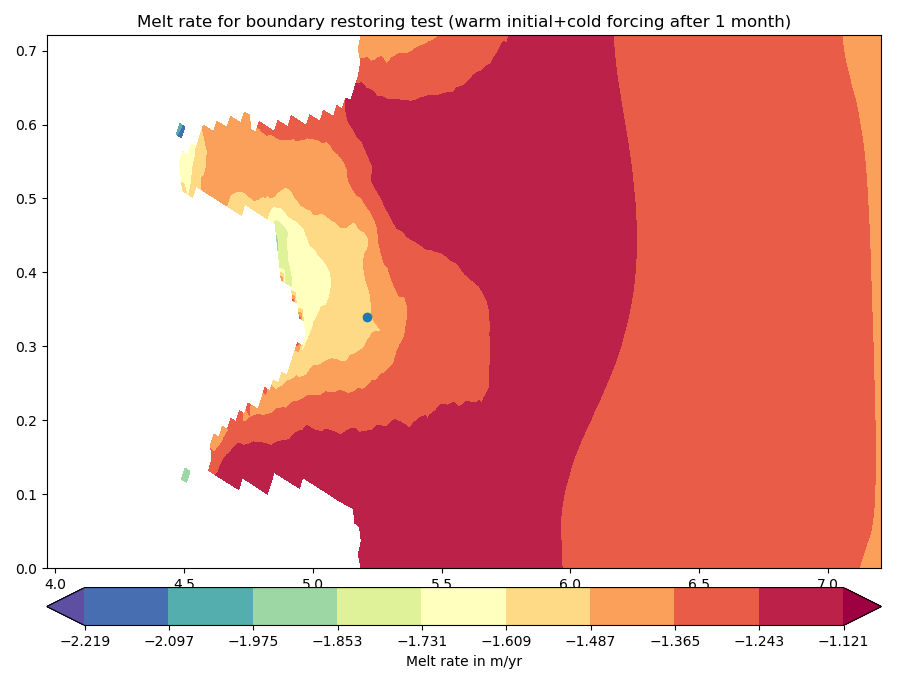

For depth 200 model level 200.0 will be used


In [39]:
meshpath  = basedir+'fesommesh/RG47911/2059/'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=True)
#pf.plot_transect_map(lon_star
fl = Dataset(basedir+'fesomdata/RG47911/RG47911.2058.oce.nc')
plt.figure(figsize=(9,7))
level_data, elem_no_nan = pf.get_data(fl['temp'][-1],mesh,200)
#level_data = level_data*365.25*24*3600
#levels = np.arange(-1.9, 1.0, 0.1)
levels = np.linspace(np.nanmin(level_data),np.nanmax(level_data),10)
plt.tricontourf(mesh.x2, mesh.y2, elem_no_nan[::], level_data, levels = levels, cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.scatter(5.21,0.34)
cbar.set_label("Melt rate in m/yr")
plt.title('Melt rate for boundary restoring test (warm initial+cold forcing after 1 month)')
plt.tight_layout()

In [5]:
fl['ssh'].shape

(13, 6414)

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


<IPython.core.display.Javascript object>


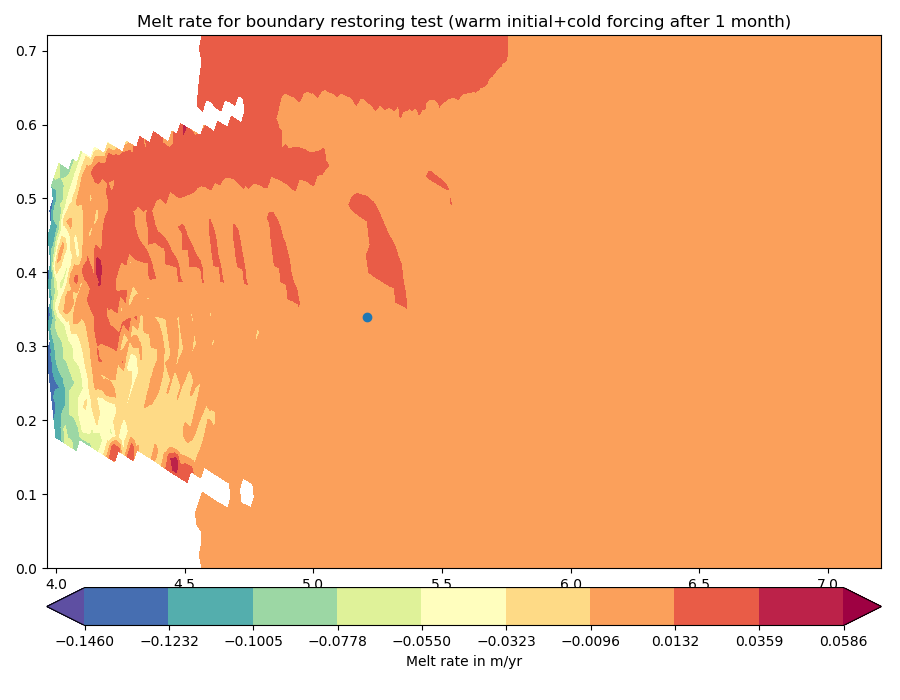

For depth 0 model level -0.0 will be used


In [6]:
meshpath  = basedir+'fesommesh/RG47911/2060/'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)
#pf.plot_transect_map(lon_star
fl = Dataset(basedir+'fesomdata/RG47911/arch/RG47911.2060.oce.nc')
plt.figure(figsize=(9,7))
level_data, elem_no_nan = pf.get_data(fl['ssh'][0],mesh,0)
#level_data = level_data*365.25*24*3600
#levels = np.arange(-1.9, 1.0, 0.1)
levels = np.linspace(np.nanmin(level_data),np.nanmax(level_data),10)
plt.tricontourf(mesh.x2, mesh.y2, elem_no_nan[::], level_data, levels = levels, cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.scatter(5.21,0.34)
cbar.set_label("Melt rate in m/yr")
plt.title('Melt rate for boundary restoring test (warm initial+cold forcing after 1 month)')
plt.tight_layout()

In [49]:
u = np.sqrt(fl['u'][-1]**2+fl['v'][-1]**2)
max(u)

0.10874265520116624

<IPython.core.display.Javascript object>


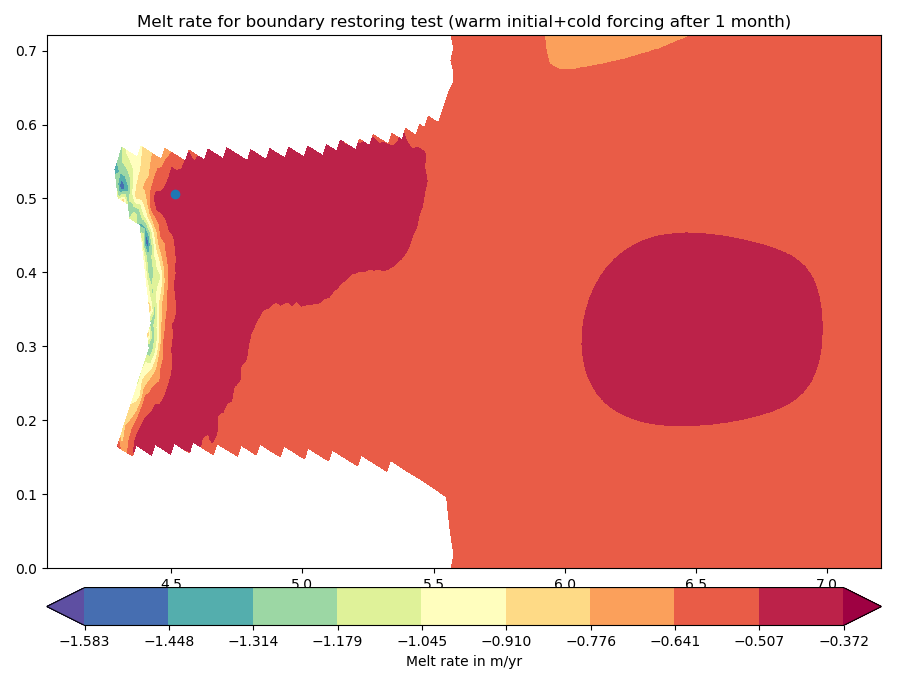

For depth 420 model level 420.0 will be used


In [26]:
plt.figure(figsize=(9,7))
level_data, elem_no_nan = pf.get_data(fl['temp'][-1],mesh,420)
#level_data = level_data*365.25*24*3600
#levels = np.arange(-1.9, 1.0, 0.1)
levels = np.linspace(np.nanmin(level_data),np.nanmax(level_data),10)
plt.tricontourf(mesh.x2, mesh.y2, elem_no_nan[::], level_data, levels = levels, cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.scatter(4.514,0.506)
cbar.set_label("Melt rate in m/yr")
plt.title('Melt rate for boundary restoring test (warm initial+cold forcing after 1 month)')
plt.tight_layout()

In [17]:
%debug

> <ipython-input-15-b95f3eb7a441>(3)plot_melt_series()
      1 def plot_melt_series(years):
      2     for year in years:
----> 3         meshpath  = basedir+'fesommesh/RG47911/'+year+'/'
      4         mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)
      5         fl = Dataset(basedir+'fesomdata/RG47911/RG47911.'+year+'.forcing.diag.nc')

ipdb> year
2021
ipdb> basedir+'fesommesh/RG47911/'+year+'/'
*** TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S51') dtype('S51') dtype('S51')
ipdb> quit


In [20]:
fl['u'][0][mesh.n32-1][:,11].shape

(6405,)

Load 2d part of the grid in 0 second(s)
correct for cavity
Load 3d part of the grid in 0 seconds


<IPython.core.display.Javascript object>


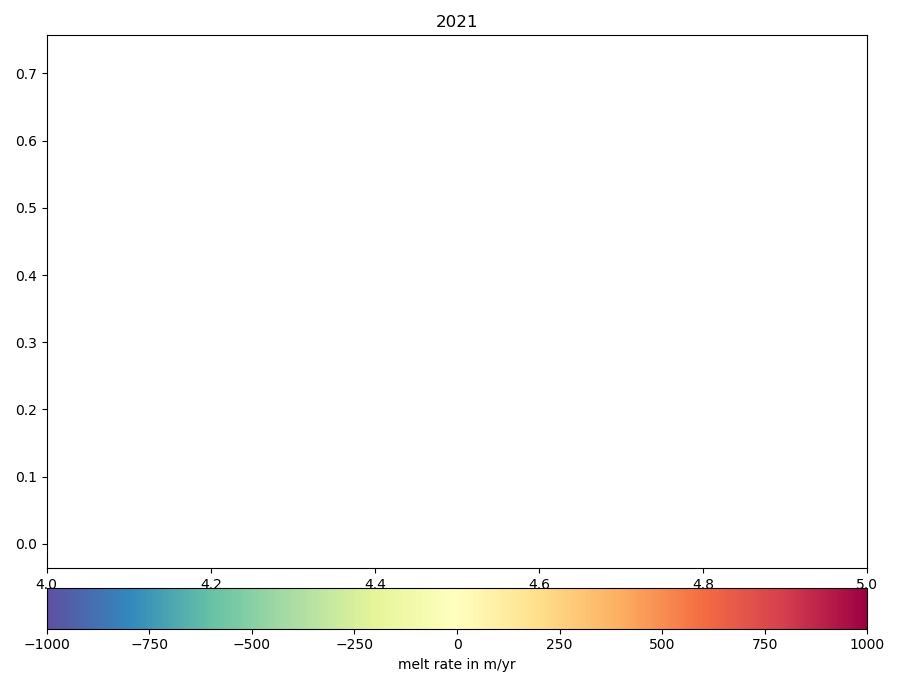

For depth 0 model level -0.0 will be used


(4, 5)

In [24]:
meshpath  = basedir+'fesommesh/iceOceanG/1008'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=True)
fl = Dataset(basedir+'fesomdata/iceOceanG/iceOceanG.1008.oce.nc')

plt.figure(figsize=(9,7))
level_data, elem_no_nan = pf.get_data(fl['u'][0][mesh.n32-1][:,11],mesh)
level_data = level_data*360*24*3600
plt.tripcolor(mesh.x2, mesh.y2, elem_no_nan, \
              level_data, \
              edgecolors='k',\
              lw = 0.1,
             cmap=cm.Spectral_r,
             vmin = -1000,
             vmax = 1000)
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("melt rate in m/yr")
plt.title('2021')
plt.tight_layout()
plt.xlim(4,5)

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


<IPython.core.display.Javascript object>


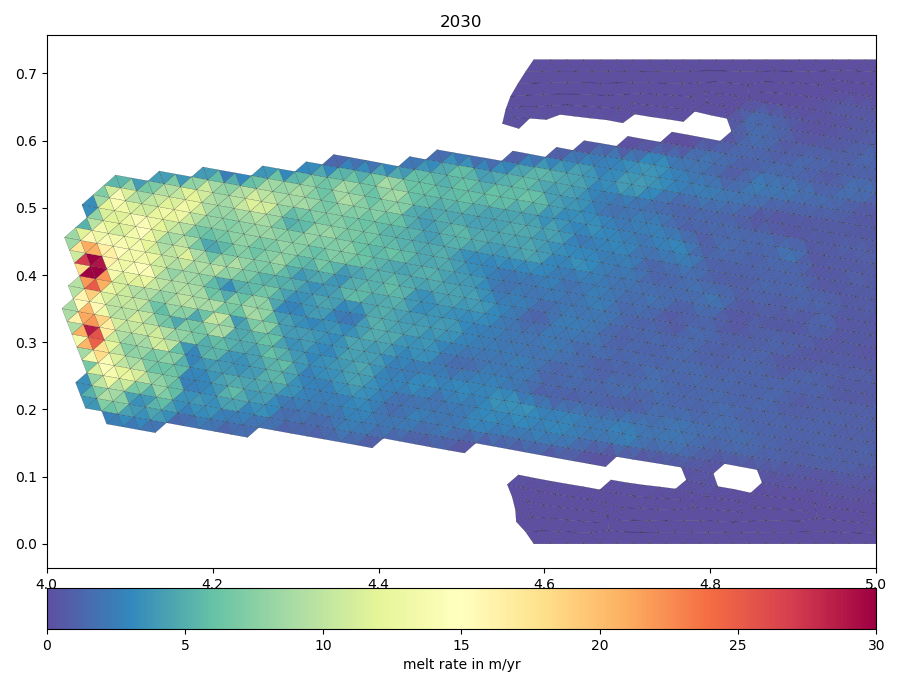

For depth 0 model level -0.0 will be used


(4, 5)

In [14]:
meshpath  = basedir+'fesommesh/RG47911/2030/'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)
fl = Dataset(basedir+'fesomdata/RG47911/RG47911.2030.forcing.diag.nc')

plt.figure(figsize=(9,7))
level_data, elem_no_nan = pf.get_data(fl['wnet'][-1],mesh,0)
level_data = level_data*360*24*3600
plt.tripcolor(mesh.x2, mesh.y2, elem_no_nan, \
              level_data, \
              edgecolors='k',\
              lw = 0.1,
             cmap=cm.Spectral_r,
             vmin = 0,
             vmax = 30)
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("melt rate in m/yr")
plt.title('2030')
plt.tight_layout()
plt.xlim(4,5)

In [13]:
sum(max(fl['wnet']))

0.0

<IPython.core.display.Javascript object>


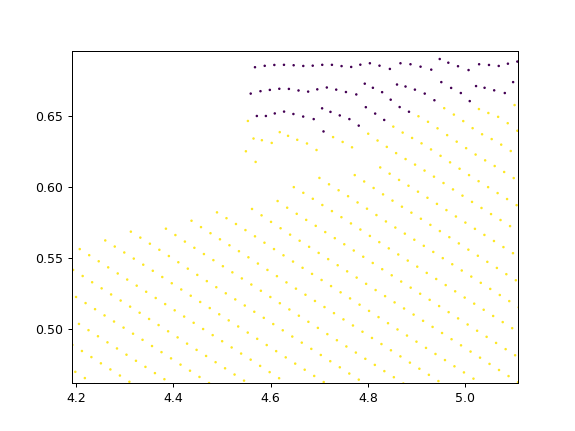

In [4]:
plt.close()
plt.scatter(mesh.x2,mesh.y2,1,mesh.cflag)
plt.show()

In [48]:
topNode = mesh.n32[:,0]
topNode

In [7]:
mesh.ind3d

<type 'netCDF4._netCDF4.Variable'>
float64 temp(T, nodes_3d)
    description: potential temperature
    units: degC
unlimited dimensions: 
current shape = (1, 166470)
filling off

Load 2d part of the grid in 0 second(s)
correct for cavity
Load 3d part of the grid in 0 seconds


<IPython.core.display.Javascript object>


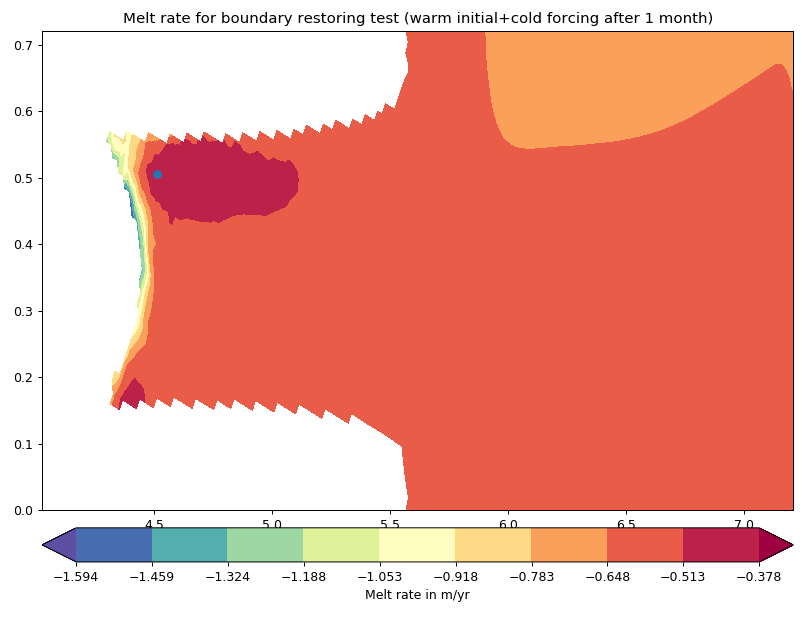

For depth 420 model level 420.0 will be used


In [8]:
#basedir = '/mnt/lustre01/work/ab0995/a270088/DATA/swift.dkrz.de/'
basedir = '/work/ollie/orichter/MisomipPlus/'
meshpath  = basedir+'fesom_mesh/000'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=True)
lon_start = min(mesh.x2)
lat_start = np.mean(mesh.y2)
lon_end   = max(mesh.x2)
lat_end   = np.mean(mesh.y2)
#pf.plot_transect_map(lon_star
fl = Dataset(basedir+'fesom_data/old/RG47911.2026.oce.nc')
plt.figure(figsize=(9,7))
level_data, elem_no_nan = pf.get_data(fl['temp'][-1],mesh,420)
#level_data = level_data*365.25*24*3600
#levels = np.arange(-1.9, 1.0, 0.1)
levels = np.linspace(np.nanmin(level_data),np.nanmax(level_data),10)
plt.tricontourf(mesh.x2, mesh.y2, elem_no_nan[::], level_data, levels = levels, cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.scatter(4.514,0.506)
cbar.set_label("Melt rate in m/yr")
plt.title('Melt rate for boundary restoring test (warm initial+cold forcing after 1 month)')
plt.tight_layout()

Load mesh

In [26]:
#meshpath  ='../../swift.dkrz.de/COREII'
#meshpath = '/work/ollie/orichter/mesh/oce0_z_grid'
meshpath = '/work/ollie/orichter/Misomip/mesh_new'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)
fl = Dataset('/work/ollie/orichter/data/oce0_z/RG47911.2025.oce.nc_tmp')
fl.variables['ssh']

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


<type 'netCDF4._netCDF4.Variable'>
float64 ssh(T, nodes_2d)
    description: sea surface elevation
    units: m
unlimited dimensions: 
current shape = (1, 6294)
filling off

In [18]:
fl['temp']

<type 'netCDF4._netCDF4.Variable'>
float64 temp(nodes_3d, T)
    description: potential temperature
    units: degC
unlimited dimensions: 
current shape = (165755, 1)
filling off

In [6]:
meshpath = '/work/ollie/orichter/mesh/oce0_z'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)
fl = Dataset('/work/ollie/orichter/data/oce0_z/RG47911.2025.oce.nc')
fl.variables['temp']

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


<type 'netCDF4._netCDF4.Variable'>
float64 temp(T, nodes_3d)
    description: potential temperature
    units: degC
unlimited dimensions: T
current shape = (12, 162935)
filling off

In [25]:
#fl = Dataset('../../swift.dkrz.de/COREII_data/fesom.1951.oce.mean.nc')
fl = Dataset('/work/ollie/orichter/data/oce0_z/RG47911.2025.oce.nc')

In [21]:
fl['temp'][:,-1]

array([-1.83485753, -1.74394359, -1.737514  , ..., -1.4977274 ,
       -1.39071091, -1.27947762])

<IPython.core.display.Javascript object>


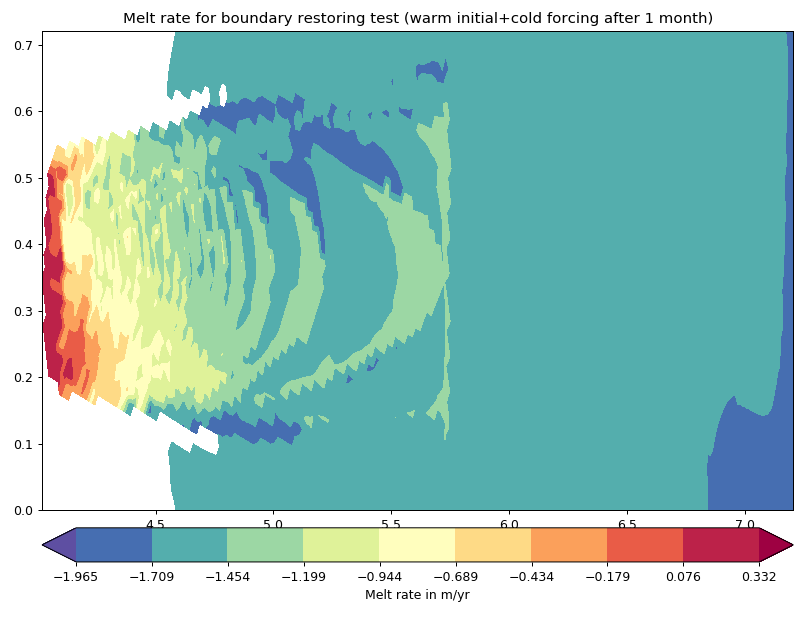

For depth 0 model level -0.0 will be used


In [24]:
plt.figure(figsize=(9,7))
level_data, elem_no_nan = pf.get_data(fl['temp'][:,-1],mesh,0)
#level_data = level_data*365.25*24*3600
#levels = np.arange(-1.9, 1.0, 0.1)
levels = np.linspace(level_data.min(),level_data.max(),10)
plt.tricontourf(mesh.x2, mesh.y2, elem_no_nan[::], level_data, levels = levels, cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Melt rate in m/yr")
plt.title('Melt rate for boundary restoring test (warm initial+cold forcing after 1 month)')
plt.tight_layout()

In [10]:
%debug

> /home/ollie/orichter/pyfesom/notebooks/netCDF4/_netCDF4.pyx(1638)netCDF4._netCDF4._ensure_nc_success()

ipdb> u
> <ipython-input-9-ef5b7f4e1daf>(2)<module>()
      1 plt.figure(figsize=(9,7))
----> 2 level_data, elem_no_nan = pf.get_data(fl.temp.data,mesh,0)
      3 #level_data = level_data*365.25*24*3600
      4 #levels = np.arange(-1.9, 1.0, 0.1)
      5 levels = np.linspace(level_data.min(),level_data.max(),10)

ipdb> q


# sigma

In [9]:
meshpath = '/work/ollie/orichter/mesh/oce0_sigma_grid'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity='sigma')
fl = Dataset('/work/ollie/orichter/data/warm_sigma/RG47911.2021.oce.nc')

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


In [34]:
z0 = mesh.zcoord[mesh.n32[1]-1]
data0 = fl['temp'][-1,mesh.n32[1]-1]

In [38]:
data = np.interp(mesh.zlevs,z0,data0)
out = (mesh.zlevs < z0.min()) | (mesh.zlevs > z0.max())

In [40]:
data[out]=-999

In [41]:
data

array([-999.        , -999.        , -999.        , -999.        ,
       -999.        , -999.        ,   -1.69361619,   -1.65103272,
         -1.62802318,   -1.60020747,   -1.57120981,   -1.54172574,
         -1.51143528,   -1.48028982,   -1.44828947,   -1.41557265,
         -1.38231446,   -1.34882751,   -1.31521808,   -1.28110947,
         -1.24476564,   -1.20715013,   -1.16938385,   -1.130464  ,
         -1.10819199, -999.        , -999.        , -999.        ,
       -999.        , -999.        , -999.        , -999.        ,
       -999.        , -999.        , -999.        , -999.        ,
       -999.        , -999.        , -999.        , -999.        ,
       -999.        , -999.        , -999.        , -999.        ,
       -999.        , -999.        , -999.        , -999.        ,
       -999.        , -999.        , -999.        , -999.        ,
       -999.        , -999.        , -999.        , -999.        ,
       -999.        , -999.        , -999.        , -999.     

In [32]:
level_data, elem_no_nan = pf.get_data_sigma(fl.variables['wnet'][-1,:],mesh,0)

<IPython.core.display.Javascript object>


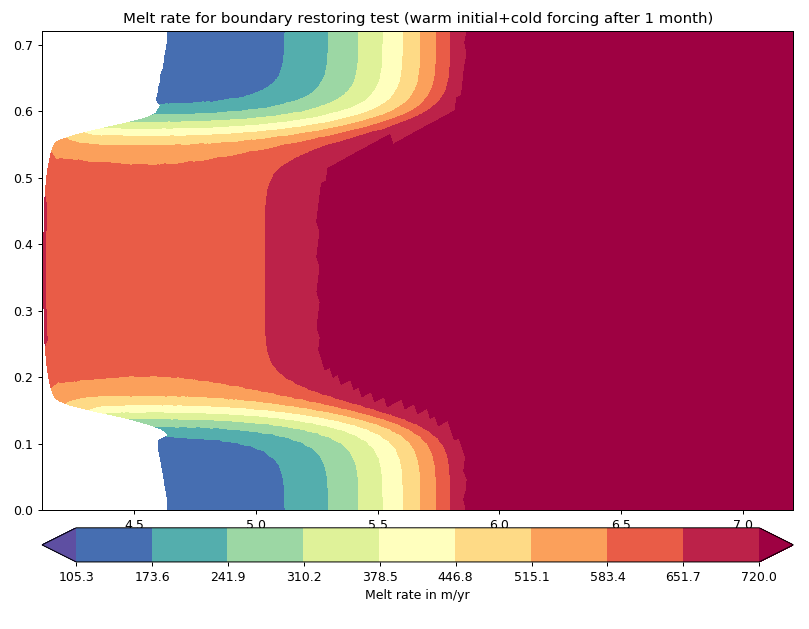

In [35]:
plt.figure(figsize=(9,7))
#level_data, elem_no_nan = pf.get_data(fl.variables['wnet'][-1,:],mesh,0)
#level_data = level_data*365.25*24*3600
#levels = np.arange(-1.9, 1.0, 0.1)
levels = np.linspace(level_data.min(),level_data.max(),10)
plt.tricontourf(mesh.x2, mesh.y2, elem_no_nan[::], level_data, levels = levels, cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Melt rate in m/yr")
plt.title('Melt rate for boundary restoring test (warm initial+cold forcing after 1 month)')
plt.tight_layout()

In [43]:
def sigma2z3d(data,mesh,z):
    #function for interpolation of 3d data on sigma level to 3d z levels
    #z levels are calculated from bathymerty (topo) and sigma distribution
    #if you nead real depth have a look on zbar variable in nc output
    sigma_lev = np.arange(37)+1
    
    topo = mesh.topo
    s,d = np.meshgrid((1-sigma_lev),topo)
    z0 = d*s #2d array with z levels at each node
    if data.shape[1] <len(sigma_lev):
        z0 = (z0[:,0:-1]+z0[:,1:])/2.0
    data_intp = np.zeros((data.shape[0],len(z)))
    data_intp[:,:] = np.nan
    #z_intp = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        zind = np.where(z < topo[i])[0][-1]+2
        data_intp[i,:zind] = np.interp(z[:zind],z0[i,:],data[i,:])
        #z_intp[i] = zind
    return data_intp


In [47]:
z = 100
data = fl.variables['temp'][-1,:]
sigma_lev = np.arange(37)+1
    
topo = mesh.topo
s,d = np.meshgrid((1-sigma_lev),topo)

In [55]:
mesh.n32.shape[1]

37

In [75]:
for prof in mesh.n32:
    i2d = prof[0]-1
    push_by = np.where(mesh.zcoord[i2d]==mesh.zlevs)[0][0]
    n32_tmp[i2d,push_by:push_by+mesh.nlev]=mesh.n32[i2d]
n32_tmp = n32_tmp[:,:mesh.nlev]

In [76]:
n32_tmp = np.ones((self.n2d,self.nlev*2),dtype=int)*-999
        for prof in self.n32:
            i2d = prof[0]-1
            push_by = np.where(self.zcoord[i2d]==self.zlevs)[0][0]
            n32_tmp[i2d,push_by:push_by+self.nlev]=self.n32[i2d]
        self.n32 = n32_tmp[:,:self.nlev]


array([-999, -999, -999, -999, -999, -999,    2, 6204, 6205, 6206, 6207,
       6208, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999,
       -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999,
       -999, -999, -999, -999])

In [65]:
mesh.topo=np.zeros(shape=(mesh.n2d))
for prof in mesh.n32:
    ind_nan = prof[prof>0]
    ind_nan=ind_nan[-1]
    mesh.topo[prof[0]-1]=mesh.zcoord[ind_nan-1]


In [71]:
mesh.n32[1]

array([   2, 6204, 6205, 6206, 6207, 6208, -999, -999, -999, -999, -999,
       -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999,
       -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999,
       -999, -999, -999, -999], dtype=int32)

In [72]:
mesh.topo[1]

220.0

In [5]:
nodes = [578, 783, 3787, 6124, 4524, 1894, 1894, 4903, 4331, 1487, 1485, 1484, 4287, 5207, 1477, 1476, 5487, 1468, 1466, 1464, 1463, 4586, 2078, 5510, 5511, 3669, 5609, 3656, 3657, 5466, 4437, 828, 5303, 2566, 5220, 4086, 4309, 827, 5363, 4792, 4399, 5033, 839, 1048, 4262, 2001, 4537, 849, 4892, 3568, 4613, 1964, 1096, 4883, 3226, 4690, 869, 4561, 2015, 4824, 3537, 4046, 5650, 887, 4382, 5333, 4612, 4611, 898, 1050, 5587, 2349, 4564, 908, 916, 4522, 1960, 5076, 3256, 2071, 5288, 928, 4426, 1954, 5387, 5036, 2483, 1047, 5028, 2094, 5087, 3595, 4947, 956, 957, 5225, 4608, 1948, 4603, 968, 4606, 3621, 5355, 2109, 1052, 4744, 1999, 4881, 1054, 4494, 2289, 4439, 3181, 1134, 4404, 4863, 1006, 4938, 1043, 4668, 2052, 5385, 3348, 1949, 4689, 1126, 4776, 4244, 1034, 5594, 2092, 4967, 1045, 1046, 4185, 5688, 5337, 2636, 2631, 2345, 5052, 4167, 4214, 1934, 2157, 5319, 5205, 6101, 761, 409]

In [3]:
mesh.zcoord[nodes]

NameError: name 'nodes' is not defined

In [18]:
(mesh.zlevs==mesh.zcoord[578])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False, False], dtype=bool)

In [23]:
np.where(mesh.zlevs==mesh.zcoord[578])[0]

array([30])

In [24]:
push = np.zeros_like(nodes)
for i,node in enumerate(nodes):
    push[i] = np.where(mesh.zlevs==mesh.zcoord[node])[0]

In [25]:
for i,node in enumerate(nodes):
    profile[i,push[i]:]=profile[i]

array([30, 29, 28, 28, 27, 26, 26, 26, 25, 24, 24, 23, 23, 22, 22, 21, 21,
       20, 20, 19, 19, 18, 17, 17, 16, 16, 16, 15, 15, 14, 14, 14, 13, 13,
       13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10,  9,  9,  9,  9,  9,  9,  9,  9,  9,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

Open the netCDF file that contains your data:

In [83]:
#fl = Dataset('../../swift.dkrz.de/COREII_data/fesom.1951.oce.mean.nc')
fl = Dataset('/work/ollie/orichter/data/test/RG47911.2021.oce.nc')

There are several variables that we can plot:

In [84]:
fl.variables.keys()

[u'time', u'iter', u'ssh', u'u', u'v', u'w', u'wpot', u'temp', u'salt']

For every timestep there is a vector of values, each coresponding to the node of the model mesh.

In [85]:
fl.variables['temp'].shape

(31, 165962)

In order to get values at some depth one should use *get_data* function from *pyfesom*. The input variables for this function are:

    data : array
        complete 3d data for one timestep
    mesh : fesom_mesh object
        mesh representation
    depth : int
        desired depth
        
As an output you will get: 

    level_data : array
        2d array (actually vector) with data from the desired level.
    elem_no_nan : array
        array with triangles (defined as triplets of node indexes) with
        not NaN elements.
        
The actual model level will be printed out.

Here is the result of requesting data from the level that is closest to 500 meters:

In [32]:
level_data, elem_no_nan = pf.get_data(fl.variables['temp'][0,:], mesh, 500)

For depth 500 model level 500.0 will be used


In [37]:
depth = 150
data2=np.zeros(shape=(mesh.n2d))
dind=(abs(mesh.zlevs-depth)).argmin()
dind

7

In [33]:
elem_no_nan.shape

(7387, 3)

In [44]:
pf.get_data(fl.variables['salt'][0,:],mesh,100)

For depth 100 model level 100.0 will be used


(array([ 33.925,  34.075,     nan, ...,  33.925,     nan,     nan]),
 array([[1993, 4797, 4865],
        [4738, 3358, 5543],
        [  26,  469,  659],
        ..., 
        [2308, 2309, 2946],
        [3982, 3983, 6170],
        [1804, 2557, 5177]]))

In [45]:
level_data.shape

(6198,)

<IPython.core.display.Javascript object>


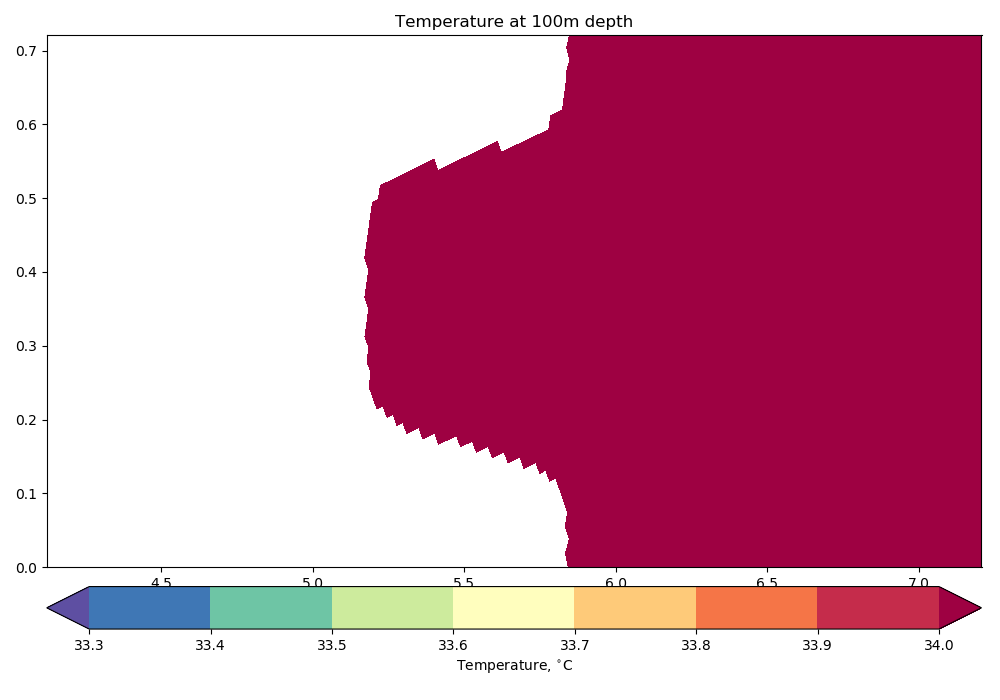

For depth 700 model level 700.0 will be used


The information from *level_data* and *elem_no_nan* is enought to make the plot:

Define the map:

In [7]:
m = Basemap(projection='robin',lon_0=0, resolution='c')
x, y = m(mesh.x2, mesh.y2)

Plot the data from the last timestep of our dataset at 100m depth:

For depth 100 model level 100.0 will be used


<IPython.core.display.Javascript object>


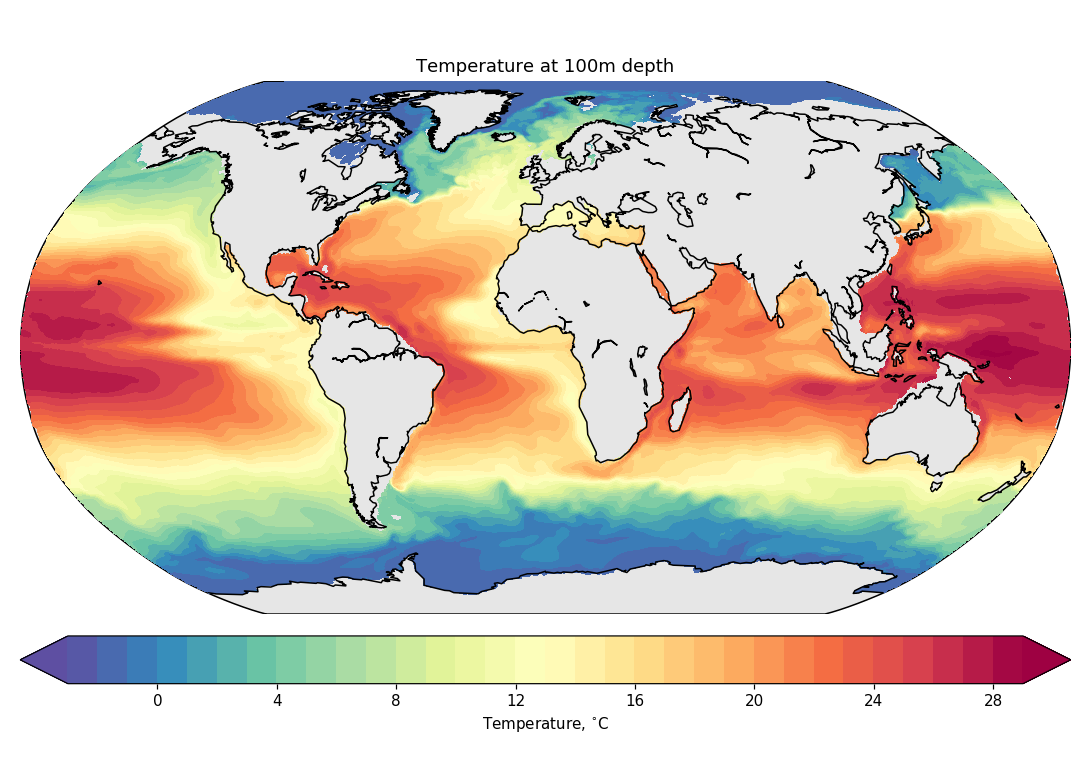

In [8]:
level_data, elem_no_nan = pf.get_data(fl.variables['temp'][-1,:],mesh,100)

plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()

levels = np.arange(-3., 30., 1)
plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")
plt.title('Temperature at 100m depth')
plt.tight_layout()

If your color range covers the whole range of your data everything is fine. But if you try to narrow the range, the places with values outside your range become masked out:

For depth 100 model level 100.0 will be used


<IPython.core.display.Javascript object>


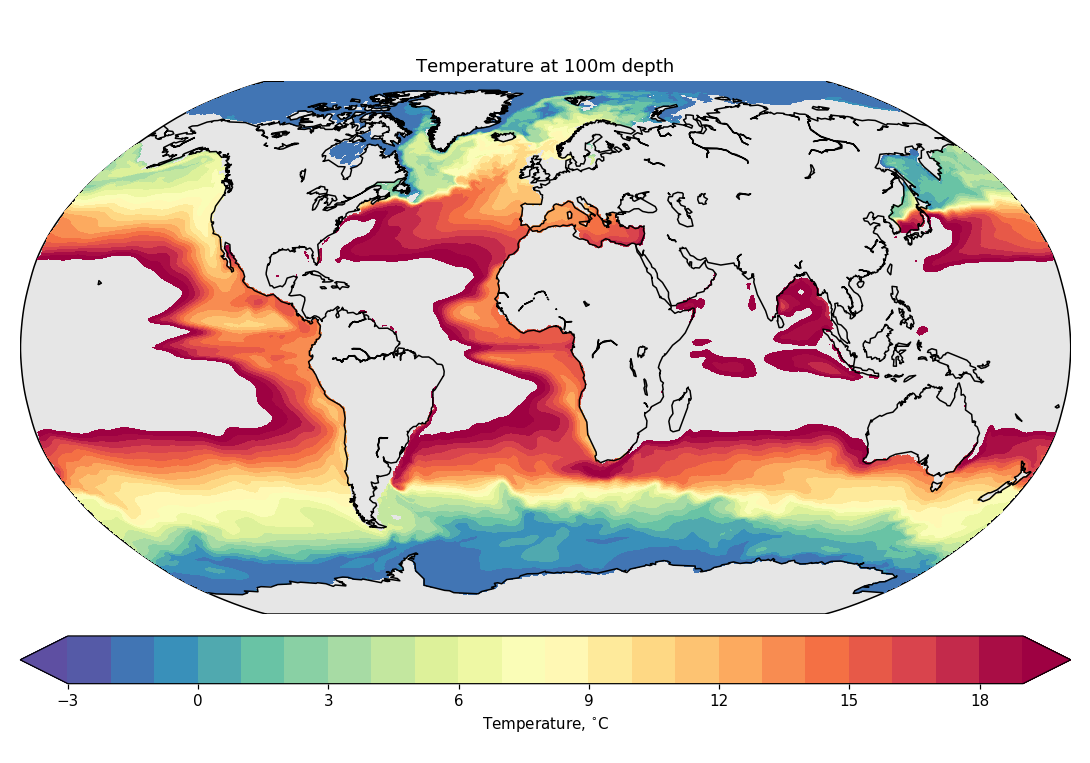

In [9]:
level_data, elem_no_nan = pf.get_data(fl.variables['temp'][-1,:],mesh,100)

plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()

levels = np.arange(-3., 20., 1)
plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")
plt.title('Temperature at 100m depth')
plt.tight_layout()

The way around it is to chnage your data :) 

For depth 100 model level 100.0 will be used


<IPython.core.display.Javascript object>


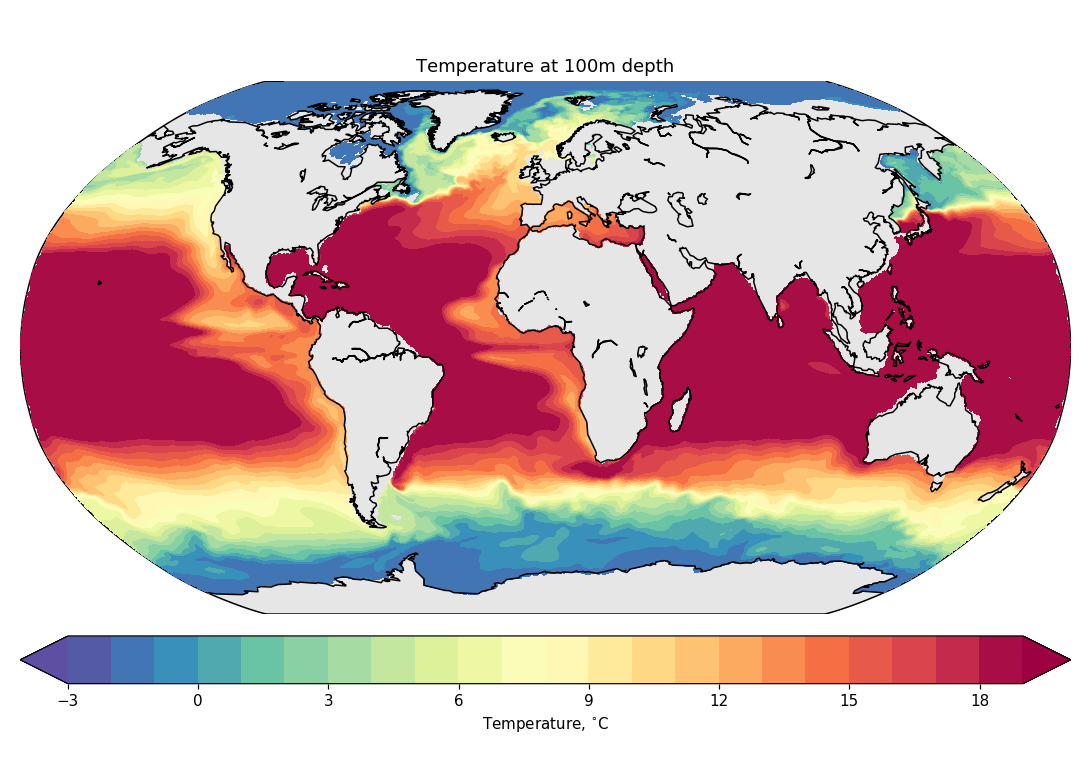

/scratch/users/nkolduno/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less_equal
/scratch/users/nkolduno/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater_equal


In [11]:
level_data, elem_no_nan = pf.get_data(fl.variables['temp'][-1,:],mesh,100)

plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()

levels = np.arange(-3., 20., 1)

eps=(levels.max()-levels.min())/50.
level_data[level_data<=levels.min()]=levels.min()+eps
level_data[level_data>=levels.max()]=levels.max()-eps
plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")
plt.title('Temperature at 100m depth')
plt.tight_layout()

The things above were easy - since it was just doing contour plots. But sometimes it is nessesary to have a look at the data on original grid. Since properties in FESOM 1.4 are defined on the verticies of the triangles, the values for making the colors of the triangles will be calculated as a mean of the values in the verticies. 

For depth 100 model level 100.0 will be used


<IPython.core.display.Javascript object>


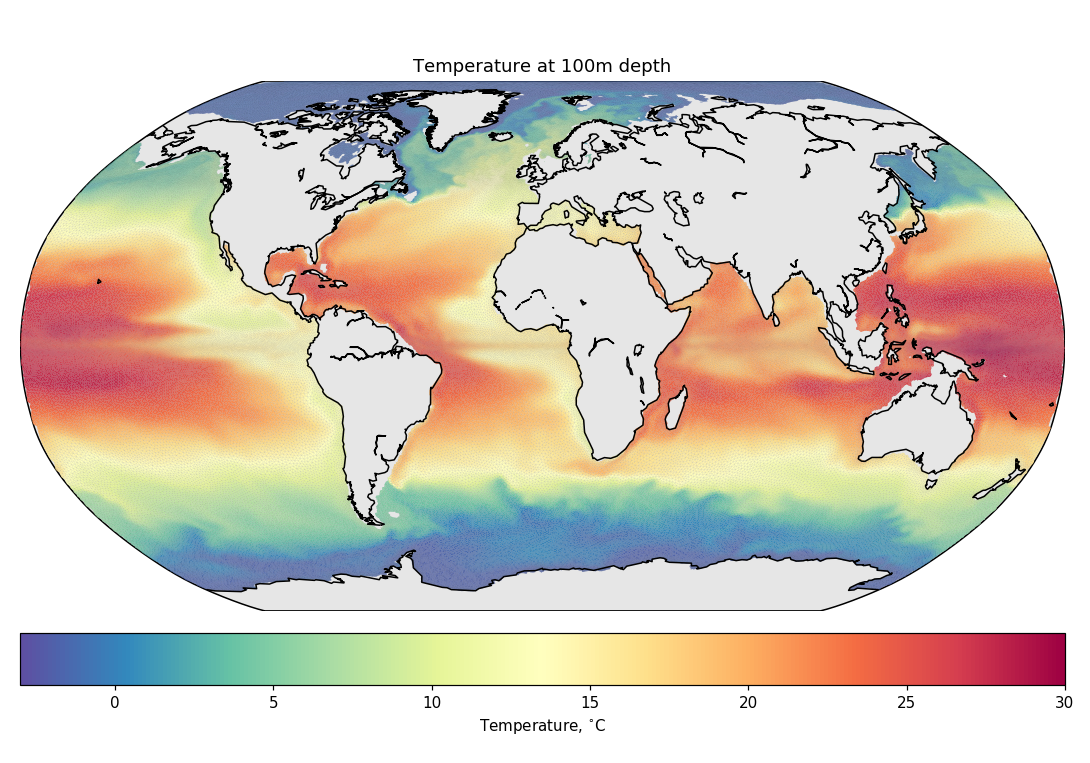

In [12]:
level_data, elem_no_nan = pf.get_data(fl.variables['temp'][-1,:],mesh,100)

plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()

plt.tripcolor(x, y, elem_no_nan, \
              level_data, \
              edgecolors='k',\
              lw = 0.01,
             cmap=cm.Spectral_r,
             vmin = -3,
             vmax = 30)
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")
plt.title('Temperature at 100m depth')
plt.tight_layout()


As you can see this takes considerably longer time. If you would like to have a look at the values exactly at the points were they are defined, you can try to use technique described in the *fesom_with_datashader.ipynb* tootorial.

In [13]:
m = Basemap(projection='mill',llcrnrlat=45,urcrnrlat=60,\
            llcrnrlon=-10,urcrnrlon=15,resolution='c')
x2, y2 = m(mesh.x2, mesh.y2)

For depth 0 model level -0.0 will be used


<IPython.core.display.Javascript object>


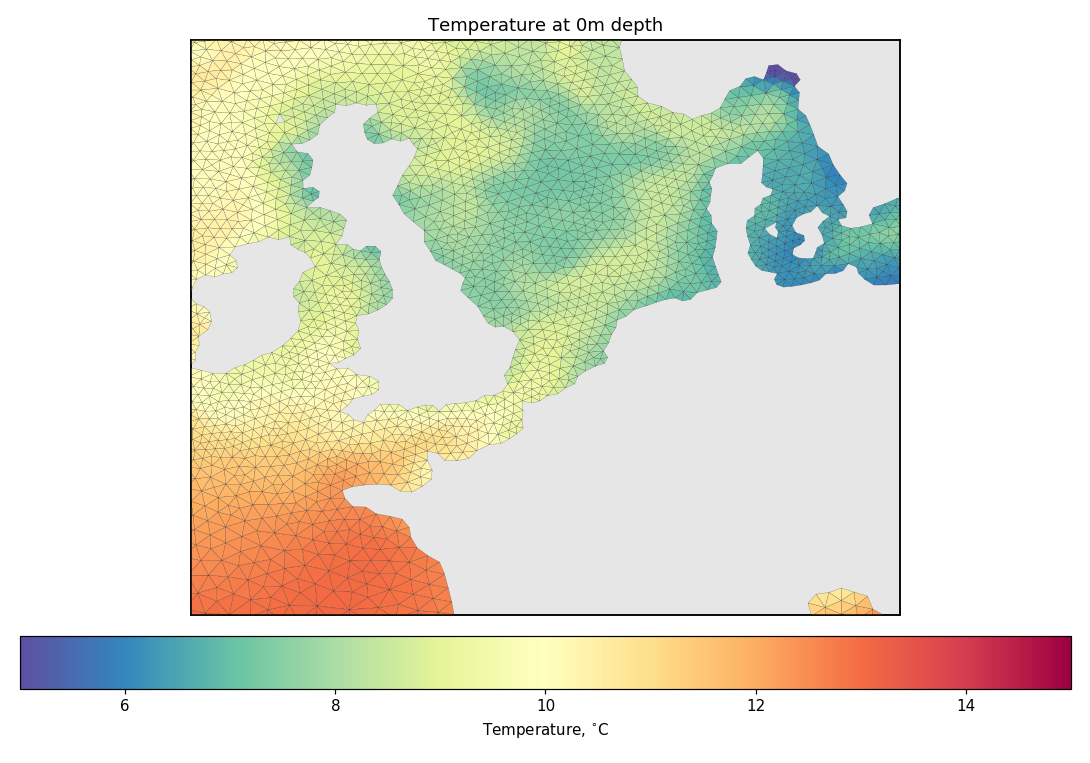

In [14]:
level_data, elem_no_nan = pf.get_data(fl.variables['temp'][-1,:],mesh,0)

plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
#m.drawcoastlines()

plt.tripcolor(x2, y2, elem_no_nan, \
              level_data, \
              edgecolors='k',\
              lw = 0.1,
             cmap=cm.Spectral_r,
             vmin = 5,
             vmax = 15)
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")
plt.title('Temperature at 0m depth')
plt.tight_layout()